In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


# 1. Vấn đề bài toán: Quora Insincere Classification

<div> 
      <li> Quora là nền tảng nổi tiếng nơi mọi người đặt cho nhau những câu hỏi để học hỏi thêm nhiều thứ. Tuy nhiên có những câu hỏi được đặt ra mang tính nhạy cảm cho người đọc. Ta phải phân loại ra những câu hỏi mang tính tiêu cực, không đúng đắn. </li>
                <b> Input </b> Câu hỏi của Quora (dữ liệu text) <br>
                <b>  Output: </b> Label Sincere (0), Insincere (1) <br>
</div>


In [2]:
train_data = pd.read_csv("/kaggle/input/quora-insincere-questions-classification/train.csv")
test_data = pd.read_csv("/kaggle/input/quora-insincere-questions-classification/test.csv")

## 1.1. Phân tích dữ liệu
- Dữ liệu có thuộc tính `qid`, `question_text`, `target`
- Khi phân loại, ta dùng thuộc tính `question_text` là đầu vào X, `target` là label y

In [3]:
train_data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


<h3>Bỏ đi các dữ liệu NA, không tồn tại trong bảng. </h3>

In [5]:
train_data.dropna(inplace = True)
train_data

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


<h3> => Từ dữ liệu được cho, ta thấy: </h3>

 - 1306122 câu hỏi `question_text` chứa giá trị text data.
 - 1306122 label `target` chứa giá trị 0, 1.
 - Dữ liệu không chứa giá trị ***NA***
 
<h4> => Giờ ta sẽ xem sự khác biệt giữa dữ liệu label 1, 0 </h4>


In [6]:
toxic_data = train_data[train_data.target == 1]
non_toxic_data = train_data[train_data.target == 0]

### Những câu hỏi Sincere của Quora ( label `target` có giá trị 0 )

In [7]:
for d in non_toxic_data.question_text.sample(10):
  print(d)

Can a person with a good childhood & parents become a psychopath?
What is the name of the Irish jig playing during the wedding scene in "Harry Potter and the Deathly Hallows Part 1"?
Why did shields have a point on the bottom?
Do Italians regret the fall of the Roman Empire?
What is the number one skill to learn when it comes to photography?
How can I get AIR ranks in JEE?
Why is there so little storage on my phone? What can I do about it?
What is the measurable effect of a faulty ATM on security in Somalia?
What is the most stupid thing that Donald Trump has ever done?
Why is growth so important for fictional characters since in real life so many people just do not grow whatever happens?


### Những câu hỏi Insincere của Quora ( label `target` có giá trị 1 )

In [8]:
for d in toxic_data.question_text.sample(10):
  print(d)

Why is Nancy Pelosi only worried about Hispanics and not other races, is her job only to stand by illegal Hispanics to get votes?
Is Donald Trump the fattest person ever to become President of the USA?
Why have Shias corrupted the Shahada?
Is it safe to leave my 3years old Daughter with 6 of my black friends?
If Tim Kaine is personally pro-life, does that mean he approves of the murder of children if democrat voters want it committed? Does Hillary have similar feelings?
Why do most women have a hard time acknowledging any benefits of a polygamist family, regardless of their opinion of the practice?
Why would Prince Edward tried to be a Royal Marine rather than something easier? His failing the training must have been a huge embarrassment.
Is Billy Joel morbidly obese these days?
Are Wives slaves that worship their husbands in Islam?
This is question to all females on Quora. Are you happy with size and shape of your boobs? If not, how would you like them to be.


## 1.2. Nhận xét về dữ liệu 

(80810, 3) (1225312, 3)
--------------------------


<AxesSubplot:xlabel='target', ylabel='count'>

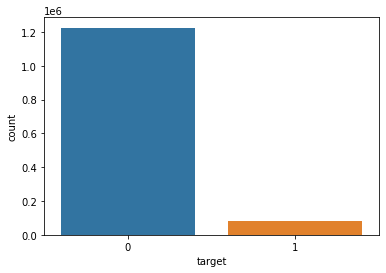

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(toxic_data.shape, non_toxic_data.shape)
print("--------------------------")

sns.countplot(x='target', data=train_data)

<h3> Hình 1 - Bảng đếm số lượng dữ liệu label 0 và label 1 </h3>

In [10]:
 print( "Dữ liệu Insincere chiếm", toxic_data.shape[0] / train_data.shape[0])
 print( "Dữ liệu Sincere chiếm", non_toxic_data.shape[0] / train_data.shape[0])

Dữ liệu Insincere chiếm 0.06187017751787352
Dữ liệu Sincere chiếm 0.9381298224821265


## Vấn đề 
Trong dữ liệu train, có 80810 dữ liệu `insincere` <b> (label 1) </b>, 1225312 dữ liệu `sincere` <b>(label 0)</b>. 
- Ở đây ta thấy dữ liệu `insincere` chỉ chiếm tỉ lệ 0.062
- Còn so với dữ liệu `sincere` chiếm tỉ lệ 0.94 => Dữ liệu mất cân bằng

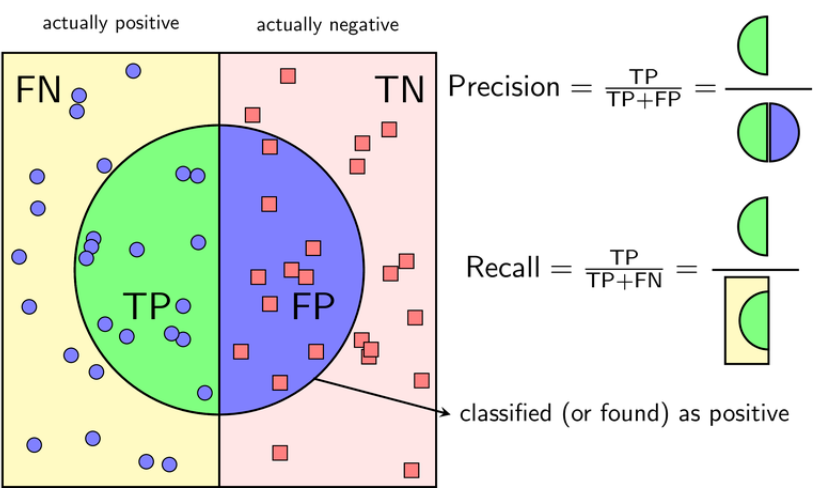

<h3> => Độ đo sử dụng là F1-Score </h3>


# 2. Đề xuất hướng làm
- <b> Tiền xử lý dữ liệu </b> (Bỏ dấu, chữ số, từ dừng, rút gọn, tách từ) <br>
  Unicode: Chuyển về dạng unicode <br>
  Lowercase : Chuyển về dạng in thường. <br>
  Punctuation, Remove Number: Bỏ dấu, chữ số. <br>
  Tokenize, Stopwords: Tách từ, Các từ dừng. <br>
  Lemmatizers: Rút gọn từ về dạng ngắn gọn.<br>

=> Loại bỏ các từ không ý nghĩa, giúp ta xác định được các từ cần thiết để phân loại từ đó thuộc Label 1 hay 0. 

- <b> Trích xuất dữ liệu </b>   
Sử dụng `CountVectorizer` để trích xuất các từ, biến words thành dạng vectors ở dạng `Bag-of-Words` bằng cách đếm số lần xuất hiện của các từ trong bộ dữ liệu.

- <b> Huấn luyện mô hình </b>  
Áp dụng mô hình học máy `Logistic Regression`, `LinearSVC` để huấn luyện, dự đoán.
Sử dụng `OverSampling` thử xem kết quả như thế nào với mô hình trên.



## 2.1. Tiền xử lý

Code ở đây em tải về bộ từ điển định nghĩa sẵn trong NLTK  

In [11]:
import re
import nltk
import string
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

contraction_dict = {"dont": "do not", "aint": "is not", "isnt": "is not", "doesnt": "does not"
, "cant": "cannot", "mustnt": "must not", "ll":"will" , "re": "are" ,"ll": "will", "wont": "will not" ,"hasnt": "has not"
, "havent": "have not", "arent": "are not", "ain't": "is not", "aren't": "are not"
,"can't": "cannot", "‘cause": "because", "could've": "could have"
, "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not"
, "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would"
,"he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you"
, "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have"
, "I'll": "I will", "I'll've": "I will have","I'm": "I am", "Iam": "I am", "I've": "I have"
, "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have"
,"i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have"
, "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us"
, "ma'am": "madam", "mayn't": "may not", "might've": "might have"
,"mightn't": "might not","mightn't've": "might not have", "must've": "must have"
, "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not"
, "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not"
, "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not"
, "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have"
, "she'll": "she will", "she'll've": "she will have", "she's": "she is"
, "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have"
, "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
"that'd've": "that would have", "that's": "that is", "there'd": "there would", 
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would"
, "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
"they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
"we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
"we'll've": "we will have", "we're": "we are", "we've": "we have", 
"weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
"what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", 
"you'll": "you will", "youll":"you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk_stopwords = stopwords.words('english')

nltk_stopwords.remove('not')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


Định nghĩa hàm `clean()` để tiền xử lý các dữ liệu theo các bước đã nêu ở trên

In [12]:
def clean(text):        
    # chuyển từ về dạng unicode 
    text = unidecode(text).encode("ascii")
    text = str(text, "ascii")

    # chuyển về dạng chữ thường, bỏ các link, kí tự đặc biệt, chữ số.
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', ' ', text)  
    text = ''.join(i for i in text if not i.isdigit())

    # Chuyển các từ viết tắt trong từ điển về dạng thường
    tokens = word_tokenize(text)
    tokens = [contraction_dict.get(token) if (contraction_dict.get(token) != None) else token for token in tokens]
    text = " ".join(tokens)

    # Bỏ các từ chứa ở trong stop-words   
    tokens = word_tokenize(text)
    tokens_without_sw = [word for word in tokens if not word in nltk_stopwords]

    # Chuyển từ về dạng số nhiều về dạng thường
    text = [lemmatizer.lemmatize(word) for word in tokens_without_sw ] 
    text = " ".join(text)

    return text


In [13]:
word = clean("æœ‰æ¯’ they're you'll aren't mean in chinese takes taking taked")
print(word)

aeoeae theyre not mean chinese take taking taked


In [14]:
train_data['clean_questions'] = train_data['question_text'].apply(clean)
train_data

,qid,question_text,target,clean_questions
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...
...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,technical skill need computer science undergra...
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,m ece good job prospect usa like india job pre...
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,foam insulation toxic
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,one start research project based biochemistry ...


In [15]:
X = train_data['clean_questions']
y = train_data['target']

X.shape,y.shape

((1306122,), (1306122,))

In [16]:
non_toxic_data = X[y == 0]
toxic_data = X[y == 1]

print("Dữ liệu Label 0 (Tiền xử lý):\n ", non_toxic_data[:10])
print('\n---------------------------\n')
print("Dữ liệu Label 1 (Tiền xử lý):\n ",toxic_data[:10])

Dữ liệu Label 0 (Tiền xử lý):
  0               quebec nationalist see province nation
1    adopted dog would encourage people adopt not shop
2    velocity affect time velocity affect space geo...
3          otto von guericke used magdeburg hemisphere
4    convert montra helicon mountain bike changing ...
5    gaza slowly becoming auschwitz dachau treblink...
6    quora automatically ban conservative opinion r...
7              crazy wash wipe grocery germ everywhere
8    thing dressing moderately different dressing m...
9    ever phase wherein became ignorant people love...
Name: clean_questions, dtype: object

---------------------------

Dữ liệu Label 1 (Tiền xử lý):
  22        united state become largest dictatorship world
30     baby sweeter parent dark skin baby light skin ...
110    black support school choice mandatory sentenci...
114    gay boy love cousin boy sexy not know hot want...
115                                  race smallest penis
119                               

<AxesSubplot:title={'center':'Top 30 từ sử dụng nhiều nhất của label 1'}, ylabel='Word'>

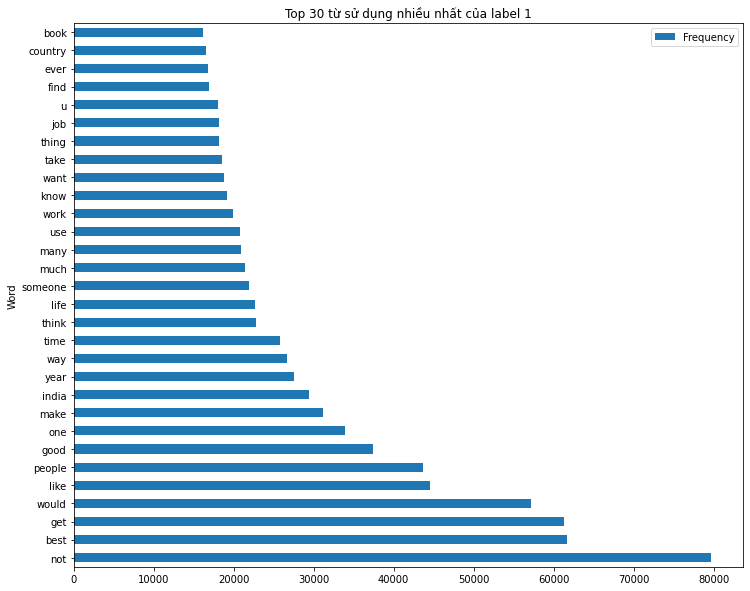

In [17]:
from collections import Counter

# top 30 words in a non toxic data
p = Counter(" ".join(non_toxic_data).split()).most_common(30)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])

rslt.plot(x='Word',kind = "barh", figsize=(12,10), title="Top 30 từ sử dụng nhiều nhất của label 1")

<AxesSubplot:title={'center':'Top 30 từ sử dụng nhiều nhất của label 1'}, ylabel='Word'>

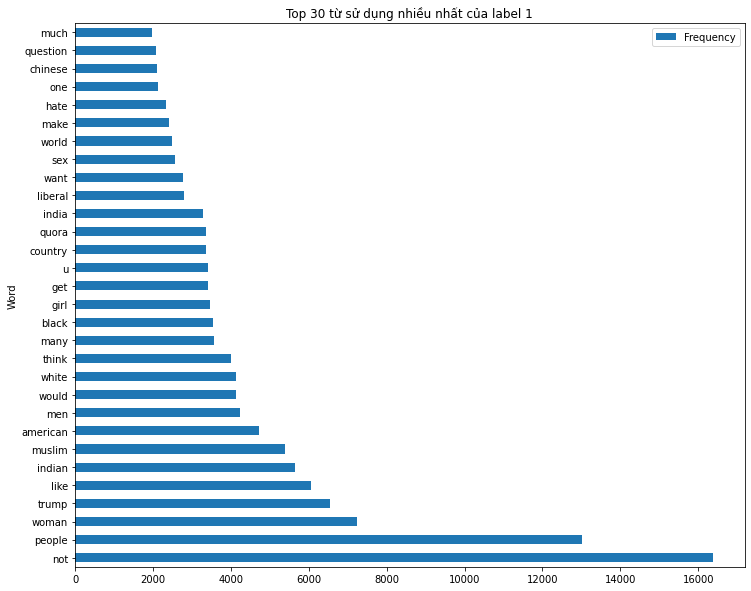

In [18]:
# top 30 words in a toxic data
p = Counter(" ".join(toxic_data).split()).most_common(30)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])

rslt.plot(x='Word',kind = "barh", figsize=(12,10), title="Top 30 từ sử dụng nhiều nhất của label 1")

Tách dữ liệu để huấn luyện mô hình, dự đoán kết quả

- Dữ liệu train = 80% 
- Dữ liệu test = 20%


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(261225,) (261225,)
(1044897,) (1044897,)


## 2.2. Vector hóa dữ liệu

- CountVectorizer N-gram = (1,3) 
 
=> Sử dụng `CountVectorizer` với n-gram trong khoảng [1,3] để trích xuất được trong khoảng 2 từ và 3 từ liên tiếp nhau.
- Trích xuất thêm dữ liệu để hiểu câu từ trong ngữ cảnh nào hơn. <br>
Giả sử như: ta có từ `germany` thì sẽ chưa hiểu nó là thuộc label nào. <br>
Nhưng nếu mà ta trích được `germany hitler` => khả năng cao câu hỏi thuộc label 1.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,3))

In [21]:
# Count Vectorizer
count_train = count_vectorizer.fit(X)

X_train_vec = count_train.transform(X_train)
X_test_vec = count_train.transform(X_test)

- Thông thường `CountVectorizer` chỉ cần bigram là đủ.

In [22]:
def get_evaluation(predictions, test):
    print('Recall: ', recall_score(predictions, test))
    print('F1 score :', f1_score(predictions, test), '\n')
    print(classification_report(test, predictions))

## 2.3. Huấn luyện mô hình

In [23]:
# Thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
import numpy as np

from sklearn.metrics import accuracy_score, recall_score ,f1_score
from sklearn.metrics import classification_report

<h2> Mô hình Logistic Regression </h2>
- Count Vectorizer với N-grams = [1,3] <br>      


In [24]:
lr = LogisticRegression(class_weight = 'balanced', random_state=0)
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
print("Logistic Regression with Count Vectorizer\n")
get_evaluation(y_pred, y_test)

Logistic Regression with Count Vectorizer

Recall:  0.5642762635617888
F1 score : 0.6062604838938959 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    244947
           1       0.56      0.65      0.61     16278

    accuracy                           0.95    261225
   macro avg       0.77      0.81      0.79    261225
weighted avg       0.95      0.95      0.95    261225



<h2> Mô hình SVC </h2>
- Count Vectorizer với N-grams = [1,3] <br>      


In [26]:
lsvc = LinearSVC(random_state=3, tol=0.01, loss='hinge', C=1, verbose=2, class_weight='balanced')

lsvc.fit(X_train_vec, y_train) 
y_pred2 = lsvc.predict(X_test_vec)

[LibLinear]

In [27]:
print('-----------\n')
print("SVC with Count Vectorizer\n")
get_evaluation(y_pred2, y_test)

-----------

SVC with Count Vectorizer

Recall:  0.6548775055679288
F1 score : 0.534559866196415 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    244947
           1       0.65      0.45      0.53     16278

    accuracy                           0.95    261225
   macro avg       0.81      0.72      0.75    261225
weighted avg       0.95      0.95      0.95    261225



<h2> Mô hình SVC + LR + Oversampling</h2>
- Count Vectorizer với N-grams = [1,3] <br>      


In [28]:
# define oversampling + undersampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train_vec, y_train)

In [29]:
from collections import Counter

print(Counter(y_over))
y_over.shape

Counter({0: 980365, 1: 490182})


(1470547,)

In [30]:
lr2 = LogisticRegression(class_weight='balanced')
lsvc2 = LinearSVC(class_weight='balanced')

lr2.fit(X_over, y_over)
y_pred3 = lr2.predict(X_test_vec)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
lsvc2.fit(X_over, y_over)
y_pred4 = lsvc2.predict(X_test_vec)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
print('Logistic Regression - Count Vectorizer - Oversampling')
get_evaluation(y_pred3, y_test)

Logistic Regression - Count Vectorizer - Oversampling
Recall:  0.5761200767407741
F1 score : 0.6005882352941176 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    244947
           1       0.58      0.63      0.60     16278

    accuracy                           0.95    261225
   macro avg       0.78      0.80      0.79    261225
weighted avg       0.95      0.95      0.95    261225



In [33]:
print('Linear SVC - Count Vectorizer - Oversampling')
get_evaluation(y_pred4, y_test)

Linear SVC - Count Vectorizer - Oversampling
Recall:  0.634935541705797
F1 score : 0.5313850880640205 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    244947
           1       0.63      0.46      0.53     16278

    accuracy                           0.95    261225
   macro avg       0.80      0.72      0.75    261225
weighted avg       0.94      0.95      0.95    261225



## So sánh mô hình

- Nhận xét: Kết quả mô hình không thay đổi sau lần OverSampling 

In [34]:
print("Logistic Regression with Count Vectorizer\n")
get_evaluation(y_pred, y_test)
print('-------------\n')
print("SVC with Count Vectorizer\n")
get_evaluation(y_pred2, y_test)
print('-------------\n')
print('Logistic Regression - Count Vectorizer - Oversampling')
get_evaluation(y_pred3, y_test)
print('-------------\n')
print('Linear SVC - Count Vectorizer - Oversampling')
get_evaluation(y_pred4, y_test)

Logistic Regression with Count Vectorizer

Recall:  0.5642762635617888
F1 score : 0.6062604838938959 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    244947
           1       0.56      0.65      0.61     16278

    accuracy                           0.95    261225
   macro avg       0.77      0.81      0.79    261225
weighted avg       0.95      0.95      0.95    261225

-------------

SVC with Count Vectorizer

Recall:  0.6548775055679288
F1 score : 0.534559866196415 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    244947
           1       0.65      0.45      0.53     16278

    accuracy                           0.95    261225
   macro avg       0.81      0.72      0.75    261225
weighted avg       0.95      0.95      0.95    261225

-------------

Logistic Regression - Count Vectorizer - Oversampling
Recall:  0.5761200767407741
F1 score : 0.6005882352941176 

             

<h2> Chọn mô hình Logistic Regression đầu tiên để kiểm tra. </h2>

# 3. Tạo submission

In [35]:
test_data['clean_questions'] = test_data['question_text'].apply(clean)
test_data

,qid,question_text,clean_questions
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,many woman become rude arrogant get little bit...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,apply rv college engineering bm college engine...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,really like nurse practitioner
3,000086e4b7e1c7146103,Who are entrepreneurs?,entrepreneur
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,education really making good people nowadays
...,...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...,many country listed gold import indua
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...,alternative dress formal party
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...,find best friendship quote telugu
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?,cause refraction light


In [36]:
X = test_data['clean_questions']

X.shape

(375806,)

In [37]:
X_vec_test = count_vectorizer.transform(X)

In [38]:
predictions = lr.predict(X_vec_test)

In [39]:
predictions.shape

(375806,)

In [40]:
test_data['prediction'] = predictions

results = test_data[['qid', 'prediction']]
results.to_csv('submission.csv', index=False)